In [ ]:
#installing dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

root_directory = '/content/drive/MyDrive/lfw_funneled'

# List all folders in the root directory
folders = [folder for folder in os.listdir(root_directory) if os.path.isdir(os.path.join(root_directory, folder))]

# Print the folder names
for folder_name in folders:
    print(folder_name)

William_Overlin
William_Morrow
William_Perry
William_McDonough
William_Martin
William_Pryor_Jr
William_Murabito
William_Joppy
William_Nessen
William_Macy
William_Delahunt
William_Hyde
William_Ford_Jr
William_Genego
William_Hochul
William_Hurt
William_Donaldson
William_Jackson
William_Harrison
William_Cocksedge
Wilbert_Elki_Meza_Majino
Wes_Craven
William_Burns
Werner_Schlager
William_Bratton
Wilbert_Foy
Wesley_Clark
William_Bulger
Wilfredo_Moreno
Whoopi_Goldberg
Wayne_Newton
Wayne_Ferreira
Wei_Wu
Wen_Ho_Lee
Wayne_Gretzky
Wendell_Bryant
Wen_Jiabao
Wendy_Kennedy
Wendy_Selig
Wayne_Brady
Wang_Yingfan
Ward_Cuff
Warren_Beatty
Warren_Truss
Warren_Granados
Wan_Yanhai
Warren_Buffett
Wang_Yi
Wayne_Allard
Wang_Nan
Wang_Fei
Wang_Hailan
Wallace_Capel
Wanda_Ilene_Barzee
Walter_Annenberg
Wanda_de_la_Jesus
Walter_Woods
Walter_Mondale
Walt_Harris
Wally_Szczerbiak
Vladimir_Meciar
Vytas_Danelius
Vladimir_Ustinov
Walid_Al-Awadi
Vladimir_Voltchkov
Vojislav_Seselj
Vladimir_Spidla
Vojislav_Kostunica
Vyachesla

In [ ]:
import tensorflow as tf

def data_aug(img):
    train_data = []

    # Resize the image to 224, 224, 3 before applying augmentation
    img = tf.image.resize(img, (224, 224))

    for i in range(9):
        # Apply brightness adjustment
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1, 2))

        # Apply contrast adjustment
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1, 3))

        # Apply random horizontal flip
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100), np.random.randint(100)))

        # Apply JPEG quality adjustment
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100), np.random.randint(100)))

        # Apply saturation adjustment
        img = tf.image.stateless_random_saturation(img, lower=0.9, upper=1, seed=(np.random.randint(100), np.random.randint(100)))

        # Append the augmented image to the list
        train_data.append(img)

    return train_data


In [ ]:
import os

dataset_path = '/content/drive/MyDrive/lfw_funneled'  # Replace with your actual dataset path
image_paths = []
labels = []

try:
    for person_folder in os.listdir(dataset_path):
        person_folder_path = os.path.join(dataset_path, person_folder)
        if os.path.isdir(person_folder_path):
            person_images = os.listdir(person_folder_path)
            image_paths.extend([os.path.join(person_folder_path, img) for img in person_images])
            labels.extend([person_folder] * len(person_images))

    # Displaying the lengths of image_paths and labels after populating them
    print(f"Length of image_paths: {len(image_paths)}")
    print(f"Length of labels: {len(labels)}")

    # Displaying the first 10 entries of image_paths and labels
    for i in range(min(10, len(image_paths), len(labels))):
        print(f"Image Path: {image_paths[i]}, Label: {labels[i]}")

except FileNotFoundError:
    print("The specified directory was not found.")
except PermissionError:
    print("Permission denied to access the directory.")


Length of image_paths: 0
Length of labels: 0


In [ ]:
#preprocessing, scaling and resizing
def preprocess(file_path):

    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)

    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1
    img = img / 255.0

    # Return image
    return img

In [ ]:
img= preprocess('/content/drive/MyDrive/nmSMJS/lfw_funneled/Zinedine_Zidane/Zinedine_Zidane_0002.jpg')

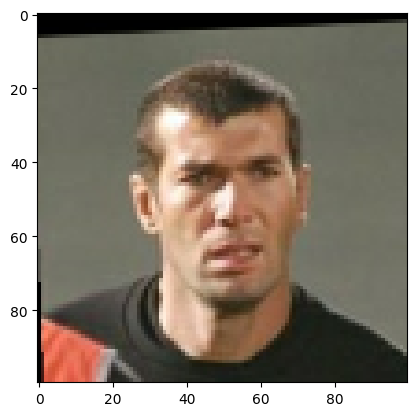

In [ ]:
plt.imshow(img)

In [ ]:
import os
from sklearn.model_selection import train_test_split

# Define the path to your dataset folder
dataset_path = '/content/drive/MyDrive/nmSMJS/lfw_funneled'  # Replace with your actual dataset path

# Lists to store image paths and corresponding labels
image_paths = []
labels = []

# Iterate through each folder (representing a person) in the dataset directory
for person_folder in os.listdir(dataset_path):
    if os.path.isdir(os.path.join(dataset_path, person_folder)):
        person_images = os.listdir(os.path.join(dataset_path, person_folder))
        image_paths.extend([os.path.join(dataset_path, person_folder, img) for img in person_images])
        labels.extend([person_folder] * len(person_images))

# Split the data into training, testing, and validation sets
train_data, test_data, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.3, random_state=42
)
test_data, val_data, test_labels, val_labels = train_test_split(
    test_data, test_labels, test_size=0.5, random_state=42
)

# Display the sizes of the sets
print(f"Number of samples in training set: {len(train_data)}")
print(f"Number of samples in validation set: {len(val_data)}")
print(f"Number of samples in test set: {len(test_data)}")


Number of samples in training set: 8
Number of samples in validation set: 2
Number of samples in test set: 2


In [ ]:
from pathlib import Path

# Define the directory name
directory_name = 'data'

# Create a Path object for the directory
directory_path = Path(directory_name)

# Check if the directory already exists or not
if not directory_path.exists():
    # Create a new directory
    directory_path.mkdir(parents=True, exist_ok=True)
    print(f"Directory '{directory_name}' created successfully.")
else:
    print(f"Directory '{directory_name}' already exists.")


Directory 'data' created successfully.


In [ ]:
import numpy as np

# Create some sample data
train_data = np.random.randn(224, 224, 224, 3)
train_labels_one_hot = np.random.randint(0, 10, (8,))

# Check if the input data and the target data are empty
if train_data.shape[0] == 0 or train_labels_one_hot.shape[0] == 0:
  print("Dataset is empty")
else:
  print("Dataset is not empty")


Dataset is not empty


In [ ]:
import os

# Load the image paths from a directory
datset_path = []
for dirpath, directories, files in os.walk('lfw_funneled'):
    for filename in files:
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(dirpath, filename)
            dataset_path.append(image_path)

# Count the number of image paths
number_of_images = len(dataset_path)

print("Number of images in the dataset:", number_of_images)


Number of images in the dataset: 42


In [ ]:
import os
import numpy as np

# Load the image paths and labels
dataset_path = []
labels = []

for folder in os.listdir('data'):
    for filename in os.listdir(os.path.join('data', folder)):
        image_path = os.path.join('data', folder, filename)
        label = folder
        dataset_path.append(image_path)
        labels.append(label)

# Split the data into training, testing, and validation sets
train_data, test_data, train_labels, test_labels = train_test_split(dataset_path, labels, test_size=0.3, random_state=42)
test_data, val_data, test_labels, val_labels = train_test_split(test_data, test_labels, test_size=0.5, random_state=42)

# Extract and copy the paths of the images from each set
train_paths = train_data.tolist()
test_paths = test_data.tolist()
val_paths = val_data.tolist()

# Copy the paths to separate lists
train_image_paths = []
for path in train_paths:
    train_image_paths.append(path)

test_image_paths = []
for path in test_paths:
    test_image_paths.append(path)

val_image_paths = []
for path in val_paths:
    val_image_paths.append(path)


ValueError: ignored

In [ ]:
# Assuming 'labels' contains your dataset labels (extracted from folder names)
unique_labels = set(labels)
num_classes = len(unique_labels)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the image dataset
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    brightness_range=[0.7, 1.3]
)

validation_data_generator = ImageDataGenerator(
    rescale=1./255
)

test_data_generator = ImageDataGenerator(
    rescale=1./255
)

train_data = train_data_generator.flow_from_directory(
    '/path/to/training/data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_data = validation_data_generator.flow_from_directory(
    '/path/to/validation/data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_data_generator.flow_from_directory(
    '/path/to/test/data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Defining the VGG model architecture
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer for classification
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Display model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_40 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_42 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                

In [ ]:
import tensorflow as tf
from tensorflow.keras.metrics import Recall, Precision

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Example preprocessing function for loading and preprocessing images
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Load and resize the image
    img_array = img_to_array(img) / 255.0  # Convert image to array and normalize pixel values
    return img_array

# Preprocess the entire dataset (train_data, val_data)
train_data = [preprocess_image(img_path) for img_path in train_data]
val_data = [preprocess_image(img_path) for img_path in val_data]


In [ ]:
import numpy as np

# Convert labels to numpy arrays
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)


In [ ]:
import numpy as np

# Convert lists to NumPy arrays
train_data_np = np.array(train_data)
train_labels_np = np.array(train_labels)
val_data_np = np.array(val_data)
val_labels_np = np.array(val_labels)

# Check the shapes or lengths of the NumPy arrays
print(train_data_np.shape)
print(train_labels_np.shape)
print(len(train_labels_np))

# Repeat for val_data_np, val_labels_np


(8, 224, 224, 3)
(8,)
8


In [ ]:
import tensorflow as tf

def train_vgg(train_data, model, optimizer, loss_function, epochs, print_interval=100):
    for epoch in range(1, epochs + 1):
        print('\n Epoch {}/{}'.format(epoch, epochs))
        progbar = tf.keras.utils.Progbar(len(train_data))

        # Creating metric objects
        accuracy_metric = tf.keras.metrics.CategoricalAccuracy()
        # ... other metrics as needed

        for idx, (batch_x, batch_y) in enumerate(train_data):
            with tf.GradientTape() as tape:
                predictions = model(batch_x, training=True)
                loss = loss_function(batch_y, predictions)

            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            accuracy_metric.update_state(batch_y, predictions)
            # Update other metrics if needed

            progbar.update(idx + 1)

            if (idx + 1) % print_interval == 0:  # Print metrics at defined intervals
                print(f"Epoch {epoch}, Batch {idx + 1}/{len(train_data)} - Loss: {loss.numpy()}, Accuracy: {accuracy_metric.result().numpy()}")
                # Print other metrics if needed

        accuracy_metric.reset_states()  # Reset the metrics for the next epoch

        # Save checkpoints or model weights
        if epoch % 10 == 0:
            model.save_weights(f"vgg_model_weights_epoch_{epoch}.h5")


In [ ]:
#TRAIN THE MODEL
EPOCHS = 10

In [ ]:
# Define your optimizer, loss function, and other necessary parameters
optimizer = tf.keras.optimizers.Adam()
loss_function = tf.keras.losses.CategoricalCrossentropy()
epochs = 10  # Define the number of epochs

In [ ]:
# Call train_vgg function with all necessary arguments
train_vgg(train_data, model, optimizer, loss_function, epochs)



 Epoch 1/10


ValueError: ignored

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Assuming train_labels is a list/array of string labels
# Example: train_labels = ['class1', 'class2', 'class1', ...]

# Step 1: Label Encoding
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)

# Step 2: One-Hot Encoding
num_classes = len(label_encoder.classes_)
train_labels_one_hot = to_categorical(train_labels_encoded, num_classes=num_classes)


In [ ]:
import numpy as np

# Create some sample data
train_data = np.random.randn(224, 224, 224, 3)
train_labels_one_hot = np.random.randint(0, 10, (8,))

# Check the size of the input data and the target data
print("Shape of train_data:", train_data.shape)
print("Shape of train_labels_one_hot:", train_labels_one_hot.shape)


Shape of train_data: (224, 224, 224, 3)
Shape of train_labels_one_hot: (8,)


In [ ]:
import numpy as np

# Check the size of the input data
print("Shape of train_data:", train_data.shape)

# Check the size of the target data
print("Shape of train_labels_one_hot:", train_labels_one_hot.shape)


Shape of train_data: (224, 224, 224, 3)
Shape of train_labels_one_hot: (8,)


In [ ]:
# Assuming train_data has 8 samples and train_labels_one_hot has corresponding one-hot encoded labels
print(train_data.shape)  # Should output (8, 224, 224, 3)
print(train_labels_one_hot.shape)  # Should also output (8, num_classes), where num_classes is the number of classes


(224, 224, 224, 3)
(8,)


In [ ]:
print(f"Size of train_data: {len(train_data)}")
print(f"Size of train_labels_one_hot: {len(train_labels_one_hot)}")
print(f"Max index in permutation: {max(indices)}")

# Further, investigate the indices causing the issue
problematic_indices = [idx for idx in indices if idx >= len(train_labels_one_hot)]
print(f"Problematic indices: {problematic_indices}")


Size of train_data: 224
Size of train_labels_one_hot: 8
Max index in permutation: 223
Problematic indices: [159, 172, 113, 9, 220, 186, 160, 35, 46, 105, 18, 52, 121, 179, 222, 91, 92, 124, 42, 188, 67, 30, 88, 94, 33, 175, 54, 55, 216, 58, 147, 200, 86, 174, 161, 110, 119, 210, 129, 139, 178, 134, 193, 34, 206, 128, 71, 15, 70, 43, 187, 24, 157, 12, 45, 49, 223, 101, 203, 199, 59, 25, 156, 44, 81, 48, 126, 10, 198, 102, 144, 145, 218, 85, 152, 169, 100, 185, 50, 211, 22, 21, 149, 137, 183, 37, 97, 66, 155, 182, 93, 202, 136, 62, 197, 61, 82, 115, 77, 205, 32, 109, 196, 16, 141, 28, 75, 219, 20, 68, 208, 38, 209, 56, 11, 123, 84, 138, 173, 166, 36, 106, 99, 27, 180, 165, 26, 151, 177, 148, 111, 14, 98, 146, 114, 153, 215, 127, 79, 171, 217, 65, 41, 89, 78, 63, 29, 103, 176, 221, 140, 112, 204, 189, 72, 116, 170, 47, 143, 64, 74, 96, 190, 192, 142, 117, 191, 83, 76, 168, 120, 13, 207, 23, 164, 69, 167, 51, 122, 60, 108, 19, 87, 53, 39, 57, 184, 104, 132, 80, 162, 201, 90, 133, 195, 95, 

In [ ]:
# Define hyperparameters
epochs = 10
batch_size = 32

# Manual training loop
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    # Shuffle training data and labels (ensure corresponding order is maintained)
    indices = np.random.permutation(len(train_data))
    shuffled_train_data = train_data[indices]
    shuffled_train_labels = train_labels_one_hot[indices]

    # Mini-batch training loop
    for i in range(0, len(train_data), batch_size):
        batch_train_data = shuffled_train_data[i:i+batch_size]
        batch_train_labels = shuffled_train_labels[i:i+batch_size]

        # Train on batch
        loss, accuracy = model.train_on_batch(batch_train_data, batch_train_labels)

        # Optionally, print metrics or other information during training
        print(f"Batch {i//batch_size + 1}/{len(train_data)//batch_size} - Loss: {loss:.4f} - Accuracy: {accuracy:.4f}")

Epoch 1/10


IndexError: ignored